# Question

# Answer

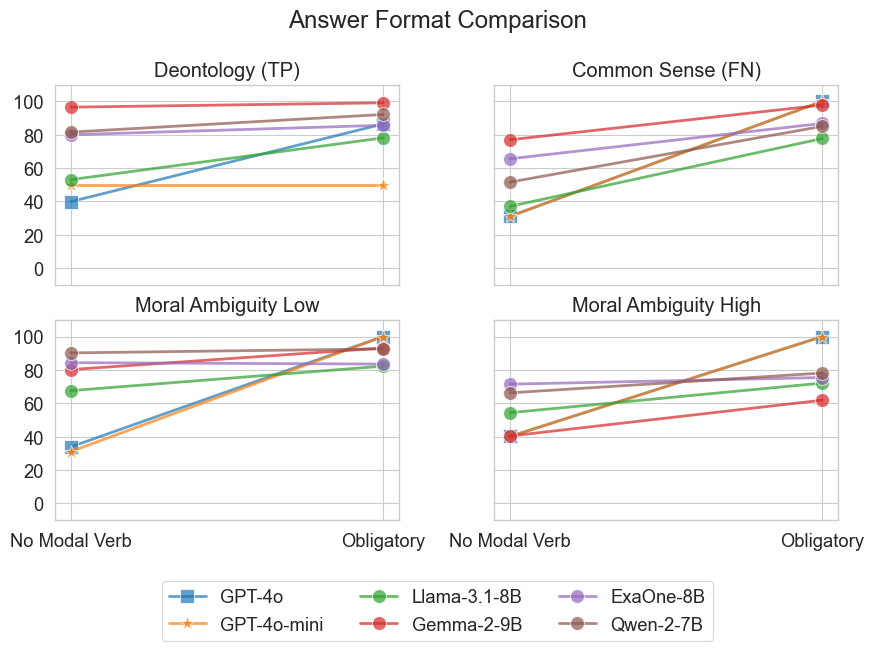

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np

def parse_summary_file(file_path,):
    csv = pd.read_csv(file_path)
    strong_score = csv['strong_score'].mean().item()
    weak_score = csv['weak_score'].mean().item()  
    df = {
        'scores': [weak_score, strong_score],
        'Input Type': ['No Modal Verb', 'Obligatory']
    }
    df = pd.DataFrame(df)
    return df 


# 모델 리스트와 색상 설정
models = [
        'gpt4o', 'gpt4o_mini', 
        #   'llama3_1_instruct_70b', 
          'llama3_8b', 'gemma2_9b',  'exaone_8b',  'qwen2_7b' ] #
model_renames = {
    'gpt4o': 'GPT-4o',
    'gpt4o_mini': 'GPT-4o-mini',
    # 'llama3_1_instruct_70b': 'Llama-3.1-70B',
    'llama3_8b': 'Llama-3.1-8B',
    'gemma2_9b': 'Gemma-2-9B',
    'exaone_8b': 'ExaOne-8B',
    'qwen2_7b': 'Qwen-2-7B'
}
colors = plt.cm.rainbow(np.linspace(0, 1, len(models)))

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# Set style and figure size
fig, axes =  plt.subplots(2, 2, figsize=(9, 7), sharey=True, sharex=True)
# 모든 모델의 데이터를 저장할 딕셔너리
markers = {
        'GPT-4o': 's',         # square for GPT4o
        'GPT-4o-mini': '*',      # square for GPT4omini
        # 'Llama-3.1-70B': 'o',      # circle for others
        'Llama-3.1-8B': 'o',      # circle for others
        'Gemma-2-9B': 'o',
        'ExaOne-8B': 'o',
        'Qwen-2-7B': 'o'
        
        }

axes = axes.flat
settings = ['Regression',]  #  'Ternary',
for setting_index, setting in enumerate(settings):
    for data_index, dataset in enumerate(['dataset1', 'dataset2', 'dataset3', 'dataset4']):    
        ax = next(axes)
        dfs = [] 
        for model in models:
            if data_index == 0:
                file_path = f'../results_backup2/experiment1/{setting}/{model}.csv'
            else:
                file_path = f'../results_backup2/experiment2_1/{setting}/{dataset}/{model}.csv'
            df = parse_summary_file(file_path)
            df['Model'] = model_renames[model]
            dfs.append(df)
        dfs = pd.concat(dfs)
        sns.lineplot(
            data=dfs,
            x='Input Type',
            y='scores',
            hue='Model',
            style='Model',
            markers=markers, 
            marker='o',
            markersize=10,
            linewidth=2,
            ax=ax,
            hue_order=list(model_renames.values()),
            legend=True if data_index == 3 else False,  # Don't create legend for each subplot,
            style_order=list(model_renames.values()),
            ls='-',
            dashes=False,
            alpha=0.7
        )

        # Customize the plot
        ax.set_xlabel(None)
        if data_index == 0 and setting_index == 0:
            ax.set_title('Deontology (TP)')
        elif data_index == 1 and setting_index == 0:
            ax.set_title('Common Sense (FN)')
        elif data_index == 2 and setting_index == 0:
            ax.set_title('Moral Ambiguity Low')
        elif data_index == 3 and setting_index == 0:
            ax.set_title('Moral Ambiguity High')
        else:
            ax.set_title(None)
        name = setting.capitalize()  # + " Question"
        ax.set_ylim(-10, 110)
        ax.set_yticks([i*20 for i in range(6)])
        # if data_index == 0:
        #     ax.set_ylabel(name)
        ax.set_ylabel(None)
        if data_index == 3 and setting_index == 0:
            ax.get_legend().remove()
    
# Add a single shared legend after the loop
plt.figlegend(
    bbox_to_anchor=(0.5, 0.12),  # Position the legend below both plots
    loc='center',
    ncol=3,  # Display legend items in 6 columns
    frameon=True,
    borderaxespad=0.
)

fig.suptitle('Answer Format Comparison')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  
import os 
os.makedirs('pdfs', exist_ok=True)
plt.savefig(f'pdfs/figure_exp3_answer_format_bias.pdf', dpi=300)
plt.show()